In [6]:
import plotly.express as px
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import scipy.stats as stats
pd.plotting.register_matplotlib_converters()
from sklearn import svm

In [2]:
df=pd.read_csv('Placement_Data_Full_Class_1.csv')

In [3]:
df.head()

Unnamed: 0  sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  \
0           0      1      M  67.00   Others  91.00   Others  Commerce   
1           1      2      M  79.33  Central  78.33   Others   Science   
2           2      3      M  65.00  Central  68.00  Central      Arts   
3           3      4      M  56.00  Central  52.00  Central   Science   
4           4      5      M  85.80  Central  73.60  Central  Commerce   

   degree_p   degree_t workex  etest_p specialisation  mba_p      status  \
0     58.00   Sci&Tech     No     55.0         Mkt&HR  58.80      Placed   
1     77.48   Sci&Tech    Yes     86.5        Mkt&Fin  66.28      Placed   
2     64.00  Comm&Mgmt     No     75.0        Mkt&Fin  57.80      Placed   
3     52.00   Sci&Tech     No     66.0         Mkt&HR  59.43  Not Placed   
4     73.30  Comm&Mgmt     No     96.8        Mkt&Fin  55.50      Placed   

     salary  
0  270000.0  
1  200000.0  
2  250000.0  
3       0.0  
4  425000.0

In [4]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

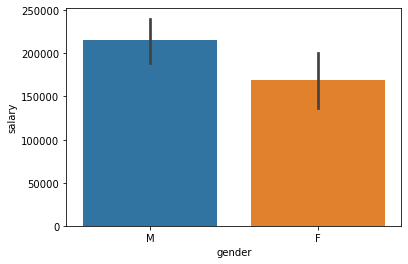

In [5]:
sns.barplot(x=df.gender,y=df.salary)
plt.savefig('Salary_Gender Relationship.eps')

<AxesSubplot:xlabel='gender', ylabel='salary'>

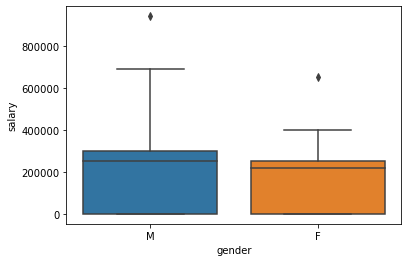

In [6]:
sns.boxplot(y=df.salary,x=df.gender)

In [7]:
#Quantile Calculation
q1=df.salary.quantile(0.25)
q3=df.salary.quantile(0.75)
IQR=q3-q1

In [8]:
lower_limit=q1-1.5*IQR
upper_limit=q3+1.5*IQR
lower_limit,upper_limit

(-423750.0, 706250.0)

In [9]:
df[(df.salary<lower_limit)|(df.salary>upper_limit)]# outlier present

sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
119    120      M   60.8  Central   68.4  Central  Commerce      64.6   

      degree_t workex  etest_p specialisation  mba_p  status    salary  
119  Comm&Mgmt    Yes    82.66        Mkt&Fin  64.34  Placed  940000.0

In [10]:
#df=df[(df.salary>lower_limit)&(df.salary<upper_limit)]#after removing outlier

<AxesSubplot:xlabel='gender', ylabel='salary'>

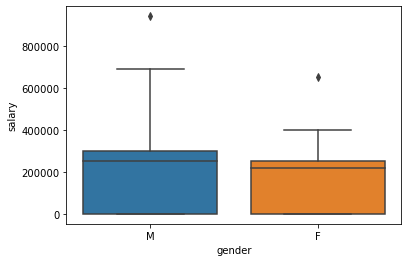

In [11]:
sns.boxplot(y=df.salary,x=df.gender)

In [12]:
df.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

<AxesSubplot:xlabel='degree_t', ylabel='count'>

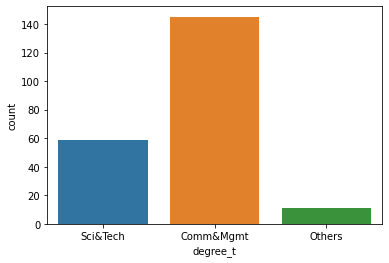

In [13]:
sns.countplot(df.degree_t)

<AxesSubplot:xlabel='degree_t', ylabel='salary'>

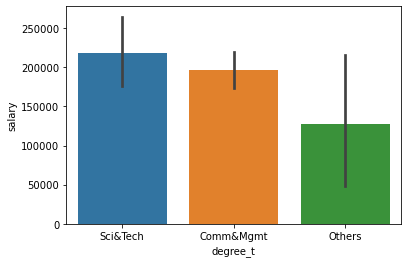

In [14]:
sns.barplot(x=df.degree_t,y=df.salary)

<AxesSubplot:xlabel='specialisation', ylabel='salary'>

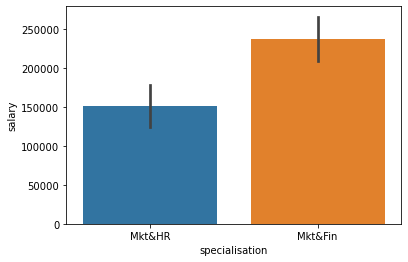

In [15]:
sns.barplot(x=df.specialisation,y=df.salary)

In [16]:
df.gender.value_counts()

M    139
F     76
Name: gender, dtype: int64

In [17]:
byGenderdf=pd.DataFrame(df.groupby(['gender','specialisation','status'])['sl_no'].count()).rename(columns={'sl_no': 'no. of students'}).reset_index()


In [18]:

fig = px.sunburst(byGenderdf, path=['gender','specialisation','status'], values='no. of students')
fig.update_layout(title="Placement % of mba in each specialisation by gender ",title_x=0.5)
fig.show()
plt.savefig('sunburst Chart for overall data visualization')

<Figure size 432x288 with 0 Axes>

# ho: Gender=Salary: there is no significant relationship b/w gender and salary
# ha:Gender#salary




In [19]:
gender_df=df.groupby('gender')
#Female_ds=df[df['gender']=='F']
#Male_ds=df[df['gender']=='M']

In [20]:
Female_ds=gender_df.salary.groups['F']
Male_ds=gender_df.salary.groups['M']

In [21]:
np.var(Female_ds),np.var(Male_ds)

(3773.3912742382267, 3862.0836395631695)

In [22]:
def plot_distribution(inp):
    plt.figure()
    ax = sns.distplot(inp)
    plt.axvline(np.mean(inp), color="k", linestyle="dashed", linewidth=5)
    _, max_ = plt.ylim()
    plt.text(
        np.mean(inp) + np.mean(inp) / 10,
        max_ - max_ / 10,
        "Mean: {:.2f}".format(np.mean(inp)),
    )
    return plt.figure

In [23]:
Male_ds.shape,Female_ds.shape

((139L,), (76L,))

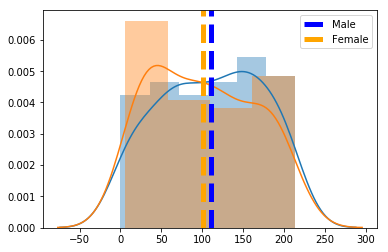

In [24]:
plt.figure()
ax1 = sns.distplot(Male_ds)
ax2 = sns.distplot(Female_ds)
plt.axvline(np.mean(Male_ds), color='b', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(Female_ds), color='orange', linestyle='dashed', linewidth=5)
plt.legend(['Male','Female'])


In [25]:
W,p=stats.shapiro(Male_ds)#data is not normally distributed as p value is less than 0.05
W,p

(0.9570540189743042, 0.00024541604216210544)

In [26]:
W,p=stats.shapiro(Female_ds)#data is not normally distribute as p value is less than 0.05
W,p

(0.9368832111358643, 0.0009311971953138709)

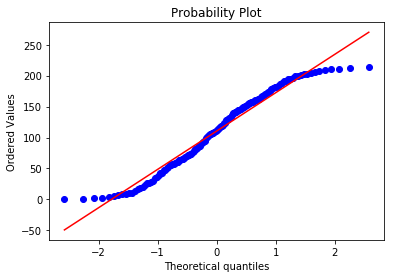

In [27]:
stats.probplot(Male_ds,plot=plt)
plt.show()

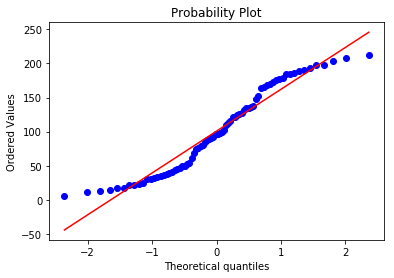

In [28]:
stats.probplot(Female_ds,plot=plt)
plt.show()

In [29]:
stats.levene(Male_ds,Female_ds)#variance are equal as p-value is greater than 0.05

LeveneResult(statistic=0.00539627291655425, pvalue=0.9415095453995393)

In [30]:
def compare_2_groups(arr_1, arr_2, alpha, sample_size):
    stat, p = ttest_ind(arr_1, arr_2)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    if p > alpha:
        print('Same distributions-Gender doesnot affect Salaries (fail to reject H0)')
    else:
        print('Different distributions-Gender affect Salaries (reject H0)')

In [31]:
sample_size = 70
female_sampled = np.random.normal(Female_ds, sample_size)
male_sampled = np.random.normal(Male_ds, sample_size)


In [32]:
stats.shapiro(male_sampled)#data is not normally distributed

(0.9906357526779175, 0.4813835918903351)

In [33]:
stats.shapiro(female_sampled)#data is normally distributed

(0.9869441986083984, 0.6298028826713562)

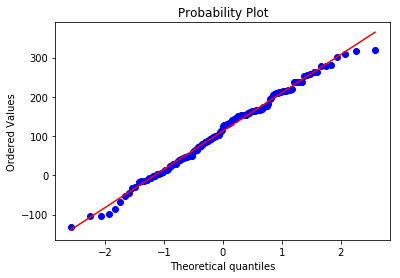

In [34]:
stats.probplot(male_sampled,plot=plt)
plt.show()

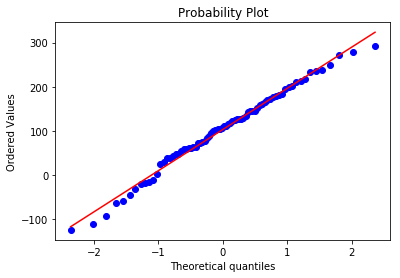

In [35]:
stats.probplot(female_sampled,plot=plt)
plt.show()

In [36]:
stats.levene(male_sampled,female_sampled)

LeveneResult(statistic=0.7351262908476836, pvalue=0.39219025552186426)

In [37]:
np.mean(male_sampled),np.mean(female_sampled),np.var(male_sampled),np.var(female_sampled),np.std(male_sampled),np.std(female_sampled)


(112.72904744211112,
 102.93212268665181,
 9299.361438523134,
 8378.038763767034,
 96.43319676606772,
 91.53162712290782)

In [38]:
compare_2_groups(female_sampled, male_sampled, 0.05, sample_size)

Statistics=-0.722, p=0.471
Same distributions-Gender doesnot affect Salaries (fail to reject H0)


In [39]:
# mann witney u test

In [40]:
stats.mannwhitneyu(Male_ds,Female_ds)

MannwhitneyuResult(statistic=4808.0, pvalue=0.13877284713024318)

# Ho: Stream = placement status(degree_t and status)-significant relationship
# Ha:Stream # placement status(degree_t and status) not significant relationship


In [41]:
pd.crosstab(df.degree_t,df.status)

status     Not Placed  Placed
degree_t                     
Comm&Mgmt          43     102
Others              6       5
Sci&Tech           18      41

In [42]:
#chi square test of indendence
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(df.degree_t,df.status))

(2.9690428771222925,
 0.22661076190356658,
 2L,
 array([[45.18604651, 99.81395349],
        [ 3.42790698,  7.57209302],
        [18.38604651, 40.61395349]]))

# pvalue is greater than 0.05 hence degree of stream have no effect on placement status

# H0: Speacilaizatin and Status


In [43]:
pd.crosstab(df.specialisation,df.status)

status          Not Placed  Placed
specialisation                    
Mkt&Fin                 25      95
Mkt&HR                  42      53

In [44]:
#chi square test of indendence
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(df.specialisation,df.status))

(12.440229009203623,
 0.00042018425858864284,
 1L,
 array([[37.39534884, 82.60465116],
        [29.60465116, 65.39534884]]))

In [5]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

sns.barplot(x=df.specialisation,y=df.salary,hue=df.status)

NameError: name 'sns' is not defined

# pvalue is less than 0.05 hence speacialization have effect on placement status

In [46]:
# H0: Speacilaizatin and salary


In [47]:
speacializatin_df=df.groupby('specialisation')

In [48]:
speacializatin_df.count()

sl_no  gender  ssc_p  ssc_b  hsc_p  hsc_b  hsc_s  degree_p  \
specialisation                                                               
Mkt&Fin           120     120    120    120    120    120    120       120   
Mkt&HR             95      95     95     95     95     95     95        95   

                degree_t  workex  etest_p  mba_p  status  salary  
specialisation                                                    
Mkt&Fin              120     120      120    120     120     120  
Mkt&HR                95      95       95     95      95      95

In [49]:
Fin_ds=speacializatin_df.salary.groups['Mkt&Fin']
HR_ds=speacializatin_df.salary.groups['Mkt&HR']


In [50]:
W,p=stats.shapiro(Fin_ds)#data is not normally distributed as p value is less than 0.05
W,p

(0.9524229168891907, 0.00032677504350431263)

In [51]:
W,p=stats.shapiro(HR_ds)#data is not normally distributed as p value is less than 0.05
W,p

(0.9522364139556885, 0.0016373522812500596)

In [52]:
stats.levene(Fin_ds,HR_ds)

LeveneResult(statistic=0.16803207596489983, pvalue=0.6822786926206771)

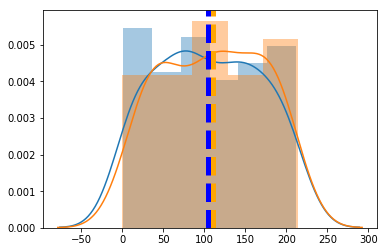

In [53]:
plt.figure()
ax1 = sns.distplot(Fin_ds)
ax2 = sns.distplot(HR_ds)
plt.axvline(np.mean(Fin_ds), color='b', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(HR_ds), color='orange', linestyle='dashed', linewidth=5)


In [54]:
Fin_ds.shape,HR_ds.shape

((120L,), (95L,))

In [55]:
def compare_2_groups1(arr_1, arr_2, alpha, sample_size):
    stat, p = ttest_ind(arr_1, arr_2)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    if p > alpha:
        print('Same distributions-Speacialization doesnot affect Salaries (fail to reject H0)')
    else:
        print('Different distributions-Speacialization affect Salaries (reject H0)')

In [56]:
sample_size =80 
female_sampled = np.random.normal(Fin_ds, sample_size)
male_sampled = np.random.normal(HR_ds, sample_size)
compare_2_groups1(female_sampled, male_sampled, 0.05, sample_size)

Statistics=-0.664, p=0.507
Same distributions-Speacialization doesnot affect Salaries (fail to reject H0)


In [57]:
np.mean(male_sampled),np.mean(female_sampled),np.var(male_sampled),np.var(female_sampled),np.std(male_sampled),np.std(female_sampled)

(111.5401183296869,
 102.46241735281261,
 10102.147085100889,
 9577.700736873287,
 100.50943779118899,
 97.86572810168678)

In [58]:
stats.mannwhitneyu(Fin_ds,HR_ds)

MannwhitneyuResult(statistic=5391.0, pvalue=0.24792613157492754)

# H0 : stream of Degree and Salary

In [59]:
stream_df=df.groupby('degree_t')

In [60]:
stream_df.count()

sl_no  gender  ssc_p  ssc_b  hsc_p  hsc_b  hsc_s  degree_p  workex  \
degree_t                                                                        
Comm&Mgmt    145     145    145    145    145    145    145       145     145   
Others        11      11     11     11     11     11     11        11      11   
Sci&Tech      59      59     59     59     59     59     59        59      59   

           etest_p  specialisation  mba_p  status  salary  
degree_t                                                   
Comm&Mgmt      145             145    145     145     145  
Others          11              11     11      11      11  
Sci&Tech        59              59     59      59      59

In [61]:
comm_ds=stream_df.salary.groups['Comm&Mgmt']
other_ds=stream_df.salary.groups['Others']
sci_ds=stream_df.salary.groups['Sci&Tech']

In [62]:
comm_ds.shape,other_ds.shape,sci_ds.shape

((145L,), (11L,), (59L,))

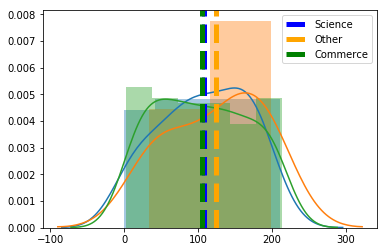

In [63]:
plt.figure()
ax1 = sns.distplot(sci_ds)
ax2 = sns.distplot(other_ds)
ax3=sns.distplot(comm_ds)
plt.axvline(np.mean(sci_ds), color='b', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(other_ds), color='orange', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(comm_ds), color='g', linestyle='dashed', linewidth=5)
plt.legend(['Science','Other','Commerce'])

In [64]:
sci_ds.shape,comm_ds.shape,other_ds.shape

((59L,), (145L,), (11L,))

In [65]:
import scipy.stats as stats
#sci_ds=np.random.normal(sci_ds,50)
#comm_ds=np.random.normal(comm_ds,50)
#other_ds=np.random.normal(other_ds,11)
stats.f_oneway(sci_ds,
               other_ds,
               comm_ds)

F_onewayResult(statistic=0.5109384230617573, pvalue=0.6006691712180383)

In [66]:
stats.kruskal(sci_ds,other_ds,comm_ds)

KruskalResult(statistic=1.0265689529550173, pvalue=0.598526500674388)

# There is a statistically no significant difference between the degree of stream and their effects the Salary, F= 0.32, p-value= 0.73.

In [67]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [68]:
formula='salary ~ C(specialisation) + C(degree_t) + C(specialisation):C(degree_t)'
model=ols(formula,data=df).fit()
anova_table=sm.stats.anova_lm(model,typ=2)
anova_table

sum_sq     df          F    PR(>F)
C(specialisation)              3.815378e+11    1.0  17.134112  0.000051
C(degree_t)                    7.197891e+10    2.0   1.616216  0.201122
C(specialisation):C(degree_t)  1.101264e+10    2.0   0.247278  0.781152
Residual                       4.653956e+12  209.0        NaN       NaN

In [69]:
byWorkExperiencedf=pd.DataFrame(df.groupby(['workex','degree_t','status'])['sl_no'].count()).rename(columns={'sl_no': 'no. of students'}).reset_index()

In [70]:
fig = px.sunburst(byWorkExperiencedf, path=['workex','status','degree_t'], values='no. of students')
fig.update_layout(title="Placement % of degree in each field  by work experience ",title_x=0.5)
fig.show()

In [2]:
df=pd.read_csv('Placement_Data_Full_Class_1.csv')

#df[(df.salary<lower_limit)|(df.salary>upper_limit)]# outlier present

#df=df[(df.salary>lower_limit)&(df.salary<upper_limit)]#after removing outlier

In [3]:
df.head()

Unnamed: 0  sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  \
0           0      1      M  67.00   Others  91.00   Others  Commerce   
1           1      2      M  79.33  Central  78.33   Others   Science   
2           2      3      M  65.00  Central  68.00  Central      Arts   
3           3      4      M  56.00  Central  52.00  Central   Science   
4           4      5      M  85.80  Central  73.60  Central  Commerce   

   degree_p   degree_t workex  etest_p specialisation  mba_p      status  \
0     58.00   Sci&Tech     No     55.0         Mkt&HR  58.80      Placed   
1     77.48   Sci&Tech    Yes     86.5        Mkt&Fin  66.28      Placed   
2     64.00  Comm&Mgmt     No     75.0        Mkt&Fin  57.80      Placed   
3     52.00   Sci&Tech     No     66.0         Mkt&HR  59.43  Not Placed   
4     73.30  Comm&Mgmt     No     96.8        Mkt&Fin  55.50      Placed   

     salary  
0  270000.0  
1  200000.0  
2  250000.0  
3       0.0  
4  425000.0

In [4]:
df.drop("sl_no",axis=1,inplace=True)

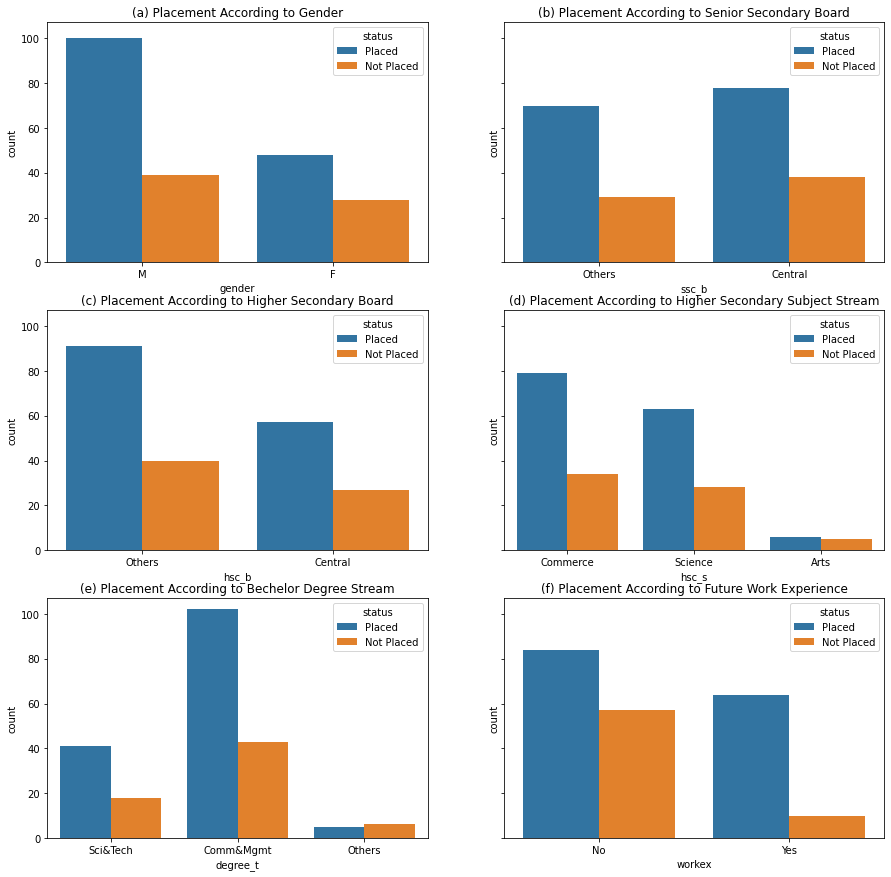

In [5]:
fig,axes=plt.subplots(3,2,figsize=(15,15),sharey=True)

sns.countplot(df.gender,hue=df.status,ax=axes[0,0])
axes[0,0].set_title("(a) Placement According to Gender")

sns.countplot("ssc_b", hue="status", data=df,ax=axes[0,1])
axes[0,1].set_title("(b) Placement According to Senior Secondary Board")

sns.countplot("hsc_b", hue="status", data=df,ax=axes[1,0])
axes[1,0].set_title("(c) Placement According to Higher Secondary Board")

sns.countplot("hsc_s", hue="status", data=df,ax=axes[1,1])
axes[1,1].set_title("(d) Placement According to Higher Secondary Subject Stream")

sns.countplot("degree_t", hue="status", data=df,ax=axes[2,0])
axes[2,0].set_title("(e) Placement According to Bechelor Degree Stream")

sns.countplot("workex", hue="status", data=df,ax=axes[2,1])
axes[2,1].set_title("(f) Placement According to Future Work Experience")

#axes.set_rasterize(True)

plt.savefig("all countplot.png")

Text(0.5, 1.0, 'f) Salary According to MBA Specialization')

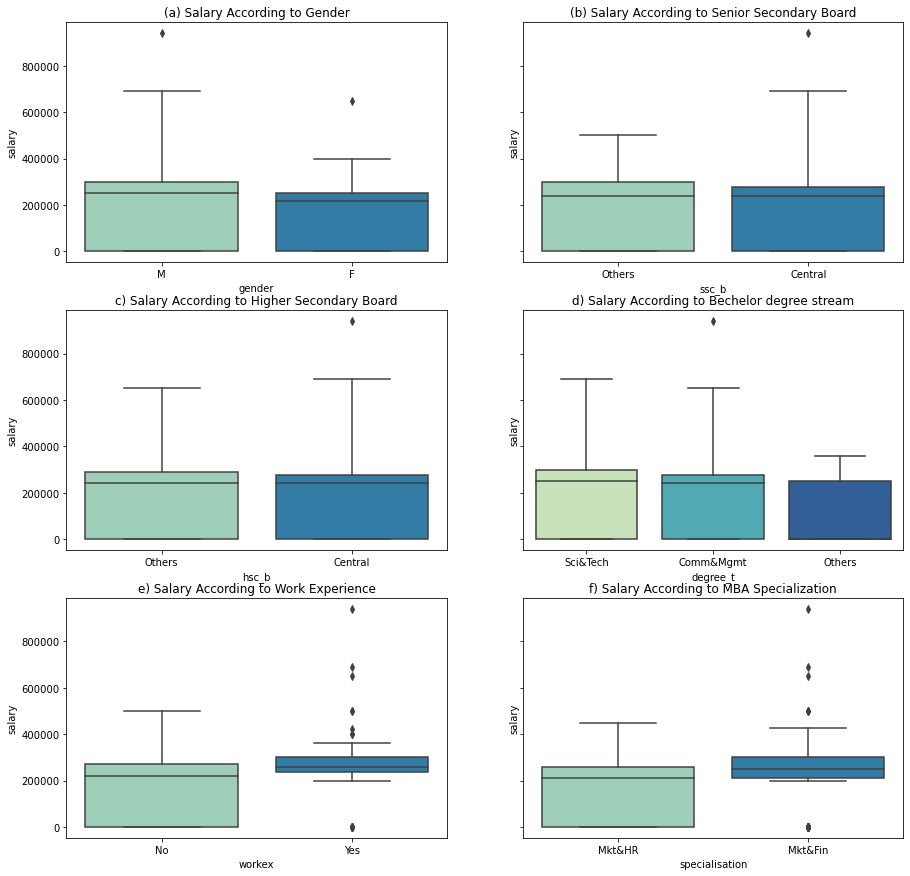

In [25]:
fig,axes=plt.subplots(3,2,figsize=(15,15),sharey=True)


sns.boxplot(y="salary",x="gender",data=df,ax=axes[0,0],palette="YlGnBu")
axes[0,0].set_title("(a) Salary According to Gender")

sns.boxplot(y="salary", x="ssc_b", data=df,ax=axes[0,1],palette="YlGnBu")
axes[0,1].set_title("(b) Salary According to Senior Secondary Board")

sns.boxplot(y="salary", x="hsc_b", data=df,ax=axes[1,0],palette="YlGnBu")
axes[1,0].set_title("c) Salary According to Higher Secondary Board")

sns.boxplot(y="salary", x="degree_t", data=df,ax=axes[1,1],palette="YlGnBu")
axes[1,1].set_title("d) Salary According to Bechelor degree stream")

sns.boxplot(y="salary", x="workex", data=df,ax=axes[2,0],palette="YlGnBu")
axes[2,0].set_title("e) Salary According to Work Experience")

sns.boxplot(y="salary", x="specialisation", data=df,ax=axes[2,1],palette="YlGnBu")

axes[2,1].set_title("f) Salary According to MBA Specialization")


#axes.set_rasterize(True)

#plt.savefig("all boxplot.eps")

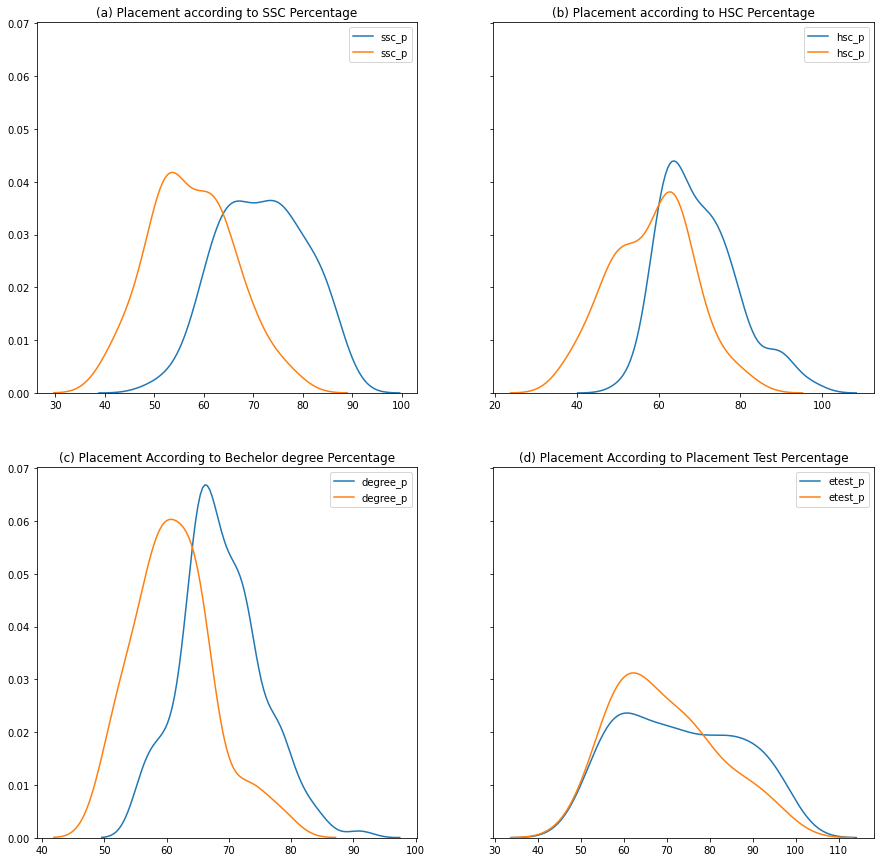

In [31]:
fig,axes=plt.subplots(2,2,figsize=(15,15),sharey=True)

sns.kdeplot(df.ssc_p[ df.status=="Placed"],ax=axes[0,0])
sns.kdeplot(df.ssc_p[ df.status=="Not Placed"],ax=axes[0,0])
axes[0,0].set_title("(a) Placement according to SSC Percentage")

sns.kdeplot(df.hsc_p[ df.status=="Placed"],ax=axes[0,1])
sns.kdeplot(df.hsc_p[ df.status=="Not Placed"],ax=axes[0,1])
axes[0,1].set_title("(b) Placement according to HSC Percentage")

sns.kdeplot(df.degree_p[ df.status=="Placed"],ax=axes[1,0])
sns.kdeplot(df.degree_p[ df.status=="Not Placed"],ax=axes[1,0])
axes[1,0].set_title("(c) Placement According to Bechelor degree Percentage")

sns.kdeplot(df.etest_p[ df.status=="Placed"],ax=axes[1,1])
sns.kdeplot(df.etest_p[ df.status=="Not Placed"],ax=axes[1,1])
axes[1,1].set_title("(d) Placement According to Placement Test Percentage")

plt.savefig("all kde plots.png")

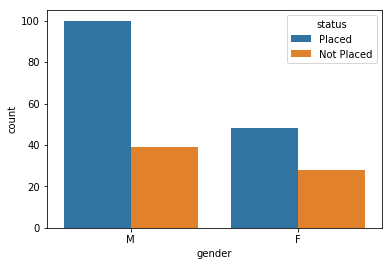

In [74]:
sns.countplot(df.gender,hue=df.status,ax=axes[0,0])
plt.savefig('fig1.png')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


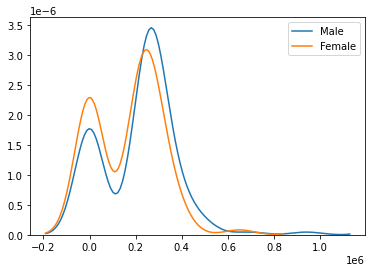

In [172]:
sns.kdeplot(df.salary[df.gender=='M'])
sns.kdeplot(df.salary[df.gender=='F'])
plt.legend(["Male","Female"])
plt.savefig('Salary Probability desnity according to Gender.eps')

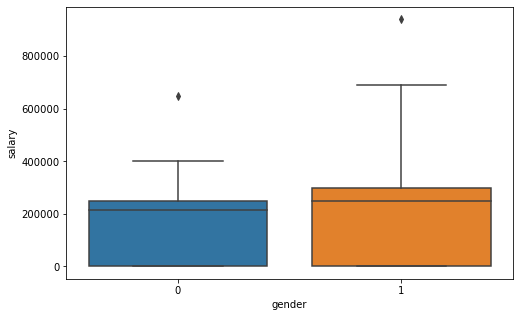

<Figure size 432x288 with 0 Axes>

In [153]:
plt.figure(figsize=(8,5))
sns.boxplot(y="salary",x="gender",data=df)
plt.show()
plt.savefig('fig2.eps')

In [174]:
# Insights
#We have samples of 139 Male studets and 76 Female students.
#30 Female and 40 Male students are not placed. Male students have comparatively higher placemets.
#More outliers on Male -> Male students are getting high CTC jobs.
#Male students are offered slightly greater salary than female on an average.

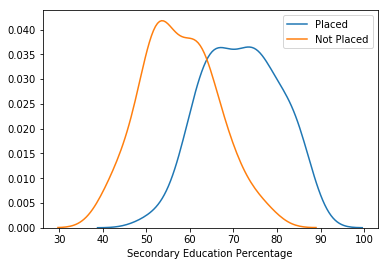

<Figure size 432x288 with 0 Axes>

In [76]:
#Kernel-Density Plot
sns.kdeplot(df.ssc_p[ df.status=="Placed"])
sns.kdeplot(df.ssc_p[ df.status=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("Secondary Education Percentage")
plt.show()
plt.savefig('fig3.eps')

In [176]:
#All students with Secondary Education Percentage above 90% are placed
#All students with Secondary Education Percentage below 50% are not-placed
#Students with good Secondary Education Percentage are placed on average.


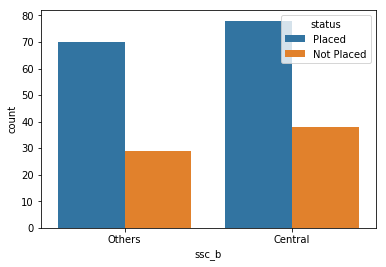

<Figure size 432x288 with 0 Axes>

In [77]:
sns.countplot("ssc_b", hue="status", data=df)
plt.show()
plt.savefig('fig4.eps')

In [178]:
#Board Of Education does not affect Placement Status much

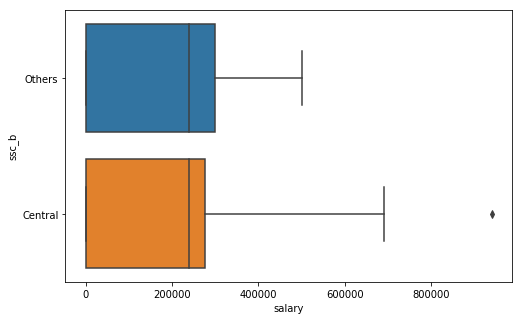

<Figure size 432x288 with 0 Axes>

In [78]:
plt.figure(figsize =(8,5))
sns.boxplot("salary", "ssc_b", data=df)
plt.show()
plt.savefig('fig5.eps')

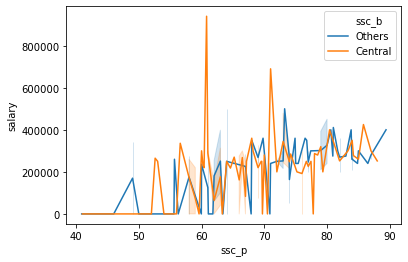

<Figure size 432x288 with 0 Axes>

In [180]:
#Outliers on both, but students from Central Board are getting the highly paid jobs.
sns.lineplot("ssc_p", "salary", hue="ssc_b", data=df)
plt.show()
plt.savefig("ssc percentage line plot according to board.eps")

In [181]:
#No specific pattern (correlation) between Secondary Education Percentage and Salary.
#Board of Education is Not Affecting Salary

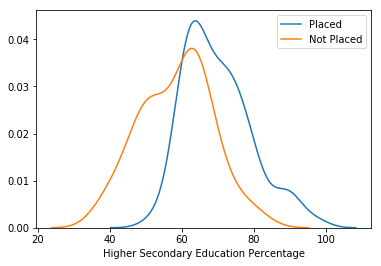

<Figure size 432x288 with 0 Axes>

In [79]:
#Kernel-Density Plot
sns.kdeplot(df.hsc_p[ df.status=="Placed"])
sns.kdeplot(df.hsc_p[ df.status=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("Higher Secondary Education Percentage")
plt.show()
plt.savefig('fig6.eps')

In [183]:
#Overlap here too. More placements for percentage above 65%
#Straight drop below 60 in placements -> Perntage must be atleast 60 for chance of being placed

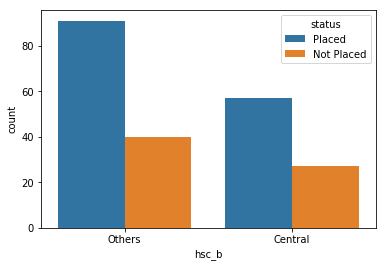

<Figure size 432x288 with 0 Axes>

In [80]:
sns.countplot("hsc_b", hue="status", data=df)
plt.show()
plt.savefig('fig7.eps')

In [185]:
#Education Board again, doesn't affect placement status much

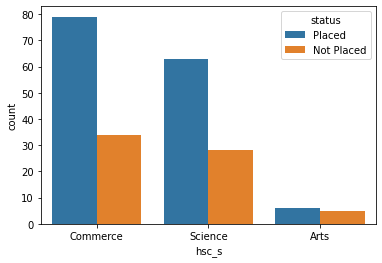

<Figure size 432x288 with 0 Axes>

In [186]:
sns.countplot("hsc_s", hue="status", data=df)
plt.show()
plt.savefig('hsc streaming countplot accorind to placement status.eps')
#We have very less students with Arts specialization.
#Around 2:1 placed:unplaced ratio for both Science and Commerse students

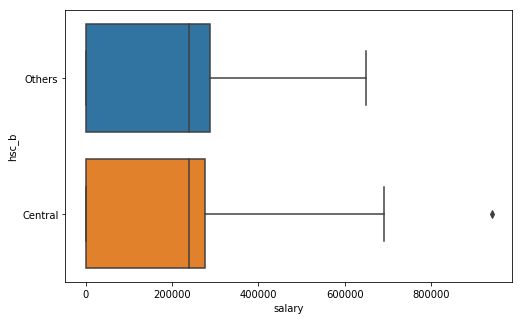

<Figure size 432x288 with 0 Axes>

In [81]:
plt.figure(figsize =(8,5))
sns.boxplot("salary", "hsc_b", data=df)
plt.show()
plt.savefig('fig8.eps')
#Outliers on both, board doesn't affect getting highly paid jobs. Highest paid job was obtailed by student 
#from Central Board though.

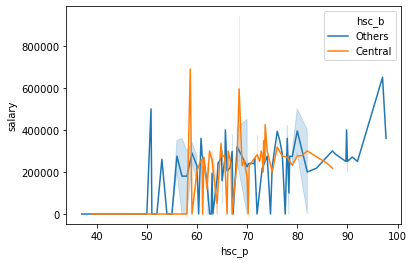

<Figure size 432x288 with 0 Axes>

In [188]:
sns.lineplot("hsc_p", "salary", hue="hsc_b", data=df)
plt.show()
plt.savefig('salary lineplot according to hsc board.eps')
#High salary from both Central and Other.
#High salary for both high and low percentage.
#Thus, both these feature doesnot affect salary.

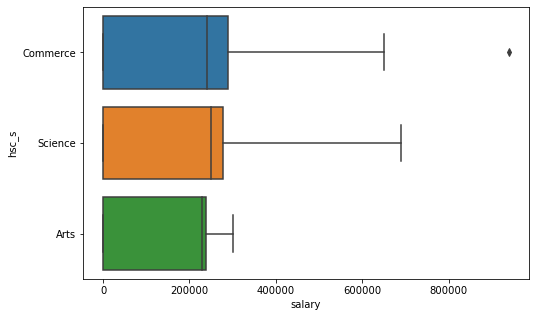

<Figure size 432x288 with 0 Axes>

In [189]:
plt.figure(figsize =(8,5))
sns.boxplot("salary", "hsc_s", data=df)
plt.show()
plt.savefig('salary boxplot accoding to hsc stream.eps')
#We can't really say for sure due to only few samples of students with Arts Major, but they aren't getting good salaries.

#Commerse students have slightly better placement status.

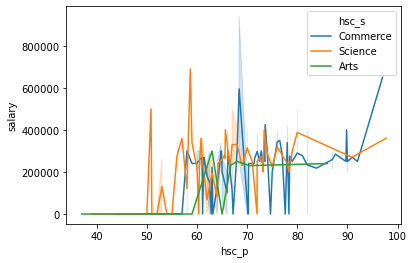

<Figure size 432x288 with 0 Axes>

In [190]:
sns.lineplot("hsc_p", "salary", hue="hsc_s", data=df)
plt.show()
plt.savefig('salary lineplot according to hsc percentage and hueness according highschooling stream.eps')

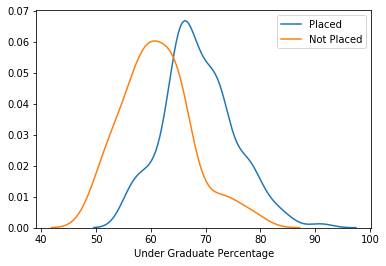

<Figure size 432x288 with 0 Axes>

In [82]:
#Kernel-Density Plot
sns.kdeplot(df.degree_p[ df.status=="Placed"])
sns.kdeplot(df.degree_p[ df.status=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("Under Graduate Percentage")
plt.show()
plt.savefig('fig9.eps')
#Overlap here too. But More placements for percentage above 65.
#UG Percentage least 50% to get placement

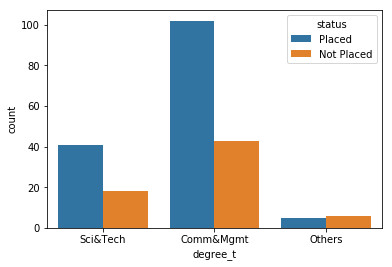

<Figure size 432x288 with 0 Axes>

In [83]:
sns.countplot("degree_t", hue="status", data=df)

plt.show()
plt.savefig('fig10.eps')
#We have very less students with "Other". We cant make decision from few cases.
#Around 2:1 placed:unplaced ratio for both Science and Commerse students

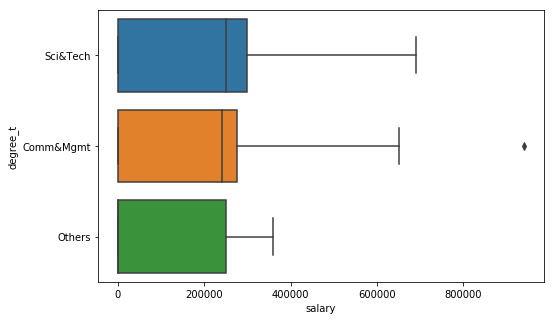

<Figure size 432x288 with 0 Axes>

In [84]:
plt.figure(figsize =(8,5))
sns.boxplot("salary", "degree_t", data=df)
plt.show()
plt.savefig('fig11.eps')
#Science&Tech students getting more salary on average
#Management stidents are getting more highly paid dream jobs.

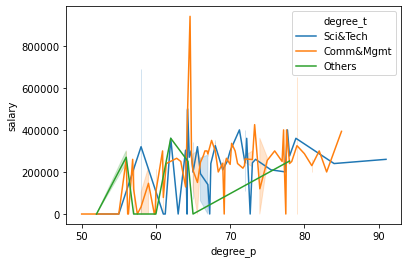

In [194]:
sns.lineplot("degree_p", "salary", hue="degree_t", data=df)
plt.show()
#Percentage does not seem to affect salary.
#Commerce&Mgmt students occasionally get dream placements with high salary

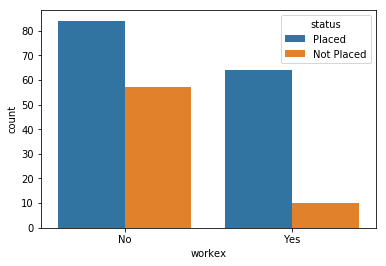

<Figure size 432x288 with 0 Axes>

In [85]:
sns.countplot("workex", hue="status", data=df)
plt.show()
plt.savefig('fig12.eps')
#This affects Placement. Very few students with work experience not getting placed!

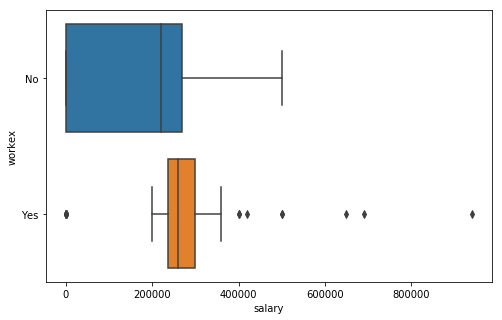

<Figure size 432x288 with 0 Axes>

In [86]:
plt.figure(figsize =(8,5))
sns.boxplot("salary", "workex", data=df)
plt.show()
plt.savefig('fig13.eps')
#Outliers (High salary than average) on bith end but students with experience getting dream jobs
#Average salary as well as base salary high for students with work experience.

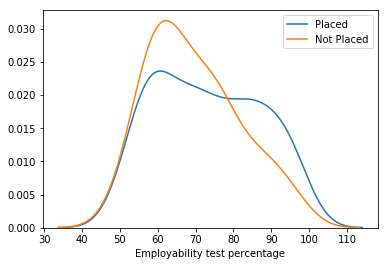

<Figure size 432x288 with 0 Axes>

In [87]:
#Kernel-Density Plot
sns.kdeplot(df.etest_p[ df.status=="Placed"])
sns.kdeplot(df.etest_p[ df.status=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("Employability test percentage")
plt.show()
plt.savefig('fig14.eps')
#High overlap -> It does not affect placement status much
#More "Not Placed" on percentage 50-70 range and more placed on 80% percentage range

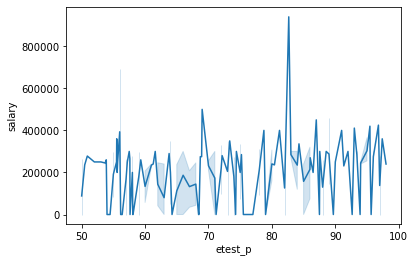

In [198]:
sns.lineplot("etest_p", "salary", data=df)
plt.show()
#This feature surprisingly does not affect placements and salary much

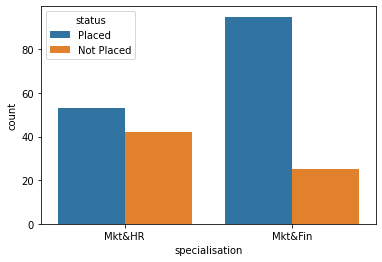

<Figure size 432x288 with 0 Axes>

In [63]:
sns.countplot("specialisation", hue="status", data=df)
plt.show()
plt.savefig('fig15.jpg')
#This feature affects Placement status.
#Comparitively very low not-placed students in Mkt&Fin Section

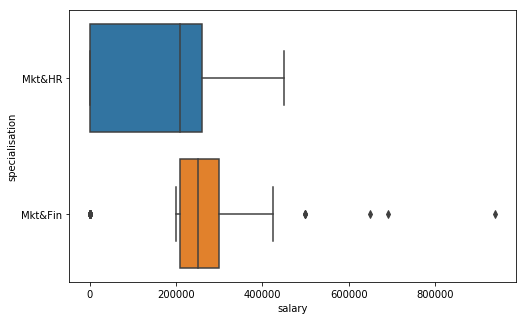

<Figure size 432x288 with 0 Axes>

In [89]:
plt.figure(figsize =(8,5))
sns.boxplot("salary", "specialisation", data=df)
plt.show()
plt.savefig('fig16.eps')
#More Highly Paid Jobs for Mkt&Fin students

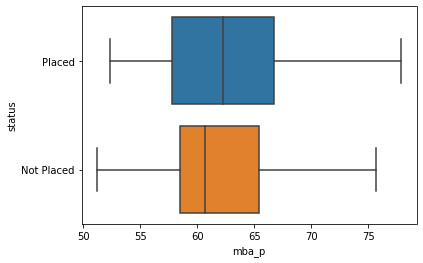

<Figure size 432x288 with 0 Axes>

In [201]:
sns.boxplot("mba_p", "status", data=df)
plt.show()
plt.savefig('mba percentage according to placement status.eps')

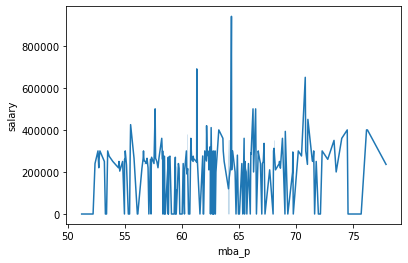

In [202]:
sns.lineplot("mba_p", "salary", data=df)
plt.show()
#MBA Percentage also deos not affect salary much

In [203]:
#df.drop(['ssc_b','hsc_b'], axis=1, inplace=True)

In [204]:
df.dtypes

Unnamed: 0          int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

In [103]:
df.gender=pd.get_dummies(df.gender,drop_first=True)

In [104]:
df.ssc_b=pd.get_dummies(df.ssc_b,drop_first=True)

In [105]:
df.hsc_b=pd.get_dummies(df.hsc_b,drop_first=True)

In [106]:
df.hsc_s=pd.get_dummies(df.hsc_s,drop_first=True)

In [107]:
df.workex=pd.get_dummies(df.workex,drop_first=True)

In [108]:
df.specialisation=pd.get_dummies(df.specialisation,drop_first=True)

In [109]:
df.status=pd.get_dummies(df.status,drop_first=True)

In [110]:
degree_t=pd.get_dummies(df.degree_t,drop_first=True)

In [111]:
df=pd.concat([df,degree_t],axis=1)

In [112]:
df.drop("degree_t",axis=1,inplace=True)

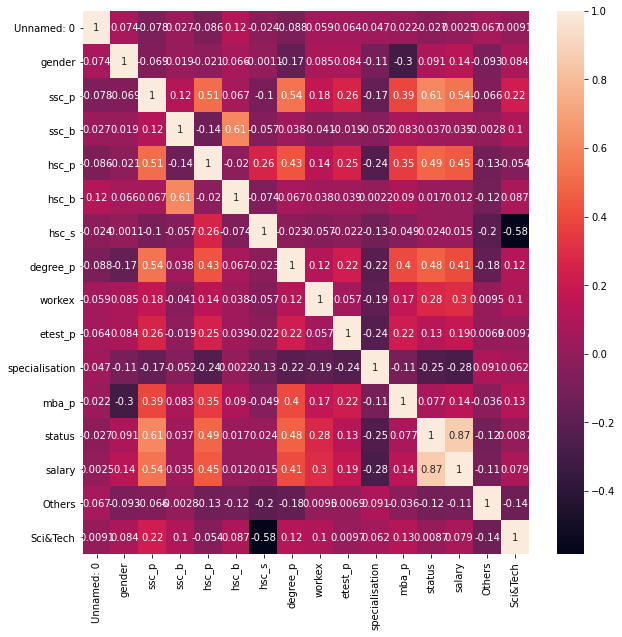

In [113]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [114]:
df_classification=df.copy()
df_regression=df.copy()


In [115]:
X=df_classification.drop(['salary','status','Unnamed: 0'],axis=1)
y=df_classification['status']

Text(0, 0.5, 'Frequency')

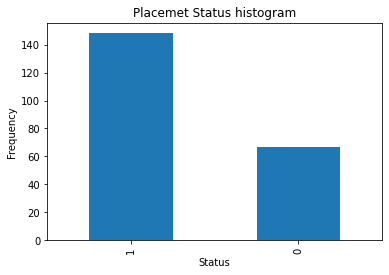

In [116]:
y.value_counts().plot(kind="bar")
plt.title('Placemet Status histogram')
plt.xlabel('Status')
plt.ylabel('Frequency')

In [117]:
from imblearn.over_sampling import SMOTE

In [118]:
sm=SMOTE(random_state=0)
X,y=sm.fit_sample(X,y.ravel())


In [119]:
from sklearn.model_selection import train_test_split

In [120]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=0)

In [121]:
xtrain.shape,xtest.shape,xtrain_res=xtrain,ytrain_res=ytrain

((172, 13), (43, 13))

In [122]:
#xtrain_res,ytrain_res=sm.fit_sample(xtrain,ytrain.ravel())

In [123]:
xtrain_res.shape,ytrain_res.shape

((242, 13), (242,))

In [124]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score,GridSearchCV

In [125]:
#scaler=StandardScaler()
#scaled_xtrain=scaler.fit_transform(xtrain_res)
#scaled_xtest=scaler.transform(xtest)

In [126]:
rf=RandomForestClassifier()

In [192]:
#param_grid = { 
#    'n_estimators': [50,100,150,200,250,300,350,400,450,500],
#    'max_features': ['auto', 'sqrt', 'log2'],
#    'max_depth' : range(1,12),
#    'criterion' :['gini', 'entropy']
#}

In [ ]:
parameters_xg = {'max_depth':[3,6,7], 'learning_rate': [0.1,0.2], 'n_estimators': [300,200], 
                 'min_child_weight': [4], 'reg_alpha': [6,0], 'reg_lambda': [1,8],'max_delta_step':[2],
                 'gamma':[0],'seed':[1]}

parameters_svm = {'C':[0.9,0.01],'kernel':['rbf','linear'], 'gamma':[0,0.1,'auto'], 'probability':[True,False],
                  'random_state':[0,7,16],'decision_function_shape':['ovo','ovr'],'degree':[3,4,10]}

parameters_rf = {'n_estimators': [100,50], 'max_features': [7,'auto',None],
                 'n_jobs': [-1], 'min_samples_leaf': [2,4,], 'random_state':[1,7,], 
                 'min_samples_split':[2,6,], 'oob_score': [True,False],
                 'criterion': ['gini'], 'warm_start': [True,False]}

In [193]:
CV_rfc = GridSearchCV(estimator=rf, param_grid=parameters_rf, cv= 5)
CV_rfc.fit(xtrain_res, ytrain_res)

KeyboardInterrupt: 

In [ ]:
CV_rfc.best_params_

In [133]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 50, max_depth=10, criterion='gini')

In [134]:

rfc1.fit(xtrain_res,ytrain_res)

RandomForestClassifier(max_depth=10, n_estimators=50, random_state=42)

In [135]:
rf_ypredict=rfc1.predict(xtest)

In [136]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

<AxesSubplot:>

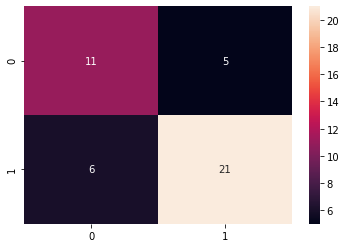

In [137]:
sns.heatmap(confusion_matrix(ytest,rf_ypredict),annot=True)

In [138]:
print(classification_report(ytest,rf_ypredict))

              precision    recall  f1-score   support

           0       0.65      0.69      0.67        16
           1       0.81      0.78      0.79        27

    accuracy                           0.74        43
   macro avg       0.73      0.73      0.73        43
weighted avg       0.75      0.74      0.75        43



In [139]:
# XGBoost Classifier
from xgboost import XGBClassifier

In [140]:
xgb_classifier=XGBClassifier()

In [141]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5],
        'n_estimators':[100,200,500],
        'learning_rate':[0.001,0.0001]        
        }

In [142]:
#CV_xgb = GridSearchCV(estimator=xgb_classifier, param_grid=params, cv= 5)
#CV_xgb.fit(xtrain_res, ytrain_res)

In [143]:
#CV_xgb.best_params_

In [144]:
xgb = XGBClassifier(colsample_bytree=1.0,gamma=0.5,max_depth=4,min_child_weight=1,subsample=0.8,n_estimators=500)

In [145]:
xgb_classifier.fit(xtrain_res,ytrain_res)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [146]:
xgb_ypredict=xgb_classifier.predict(xtest)

<AxesSubplot:>

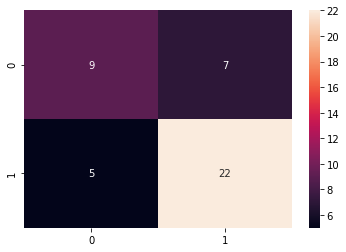

In [147]:
sns.heatmap(confusion_matrix(ytest,xgb_ypredict),annot=True)


In [148]:
print(classification_report(ytest,xgb_ypredict))

              precision    recall  f1-score   support

           0       0.64      0.56      0.60        16
           1       0.76      0.81      0.79        27

    accuracy                           0.72        43
   macro avg       0.70      0.69      0.69        43
weighted avg       0.72      0.72      0.72        43



In [149]:
#support vector machine
from sklearn.svm import SVC
parameters = {'kernel':('linear', 'rbf', 'poly'), 'C':[1, 100]}
classifier = SVC(degree=3, # default value, not tuned yet
                 gamma=1, # kernel coefficient, not tuned yet
                 coef0=1, # change to 1 from default value of 0.0
                 shrinking=True, # using shrinking heuristics
                 tol=0.001, # stopping criterion tolerance
                 probability=False, # no need to enable probability estimates
                 cache_size=200, # 200 MB cache size
                 class_weight=None, # all classes are treated equally
                 verbose=False, # print the logs
                 max_iter=-1, # no limit, let it run
                 random_state=None)
# OneVsRestClassifier(classifier, n_jobs=4)
model = GridSearchCV(classifier, parameters)

model.fit(xtrain_res, ytrain_res)







GridSearchCV(estimator=SVC(coef0=1, gamma=1),
             param_grid={'C': [1, 100], 'kernel': ('linear', 'rbf', 'poly')})

In [150]:
model.best_estimator_

SVC(C=100, coef0=1, gamma=1, kernel='linear')

In [151]:
svm=SVC(C=100,gamma=1,kernel='linear')
svm.fit(xtrain_res,ytrain_res)

SVC(C=100, gamma=1, kernel='linear')

In [152]:
svm_ypred=model.predict(xtest)

<AxesSubplot:>

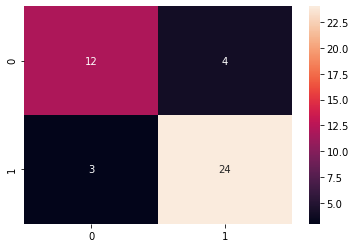

In [153]:
sns.heatmap(confusion_matrix(ytest,svm_ypred),annot=True)

In [154]:
print(classification_report(ytest,svm_ypred))

              precision    recall  f1-score   support

           0       0.80      0.75      0.77        16
           1       0.86      0.89      0.87        27

    accuracy                           0.84        43
   macro avg       0.83      0.82      0.82        43
weighted avg       0.84      0.84      0.84        43



In [155]:
#feature importance

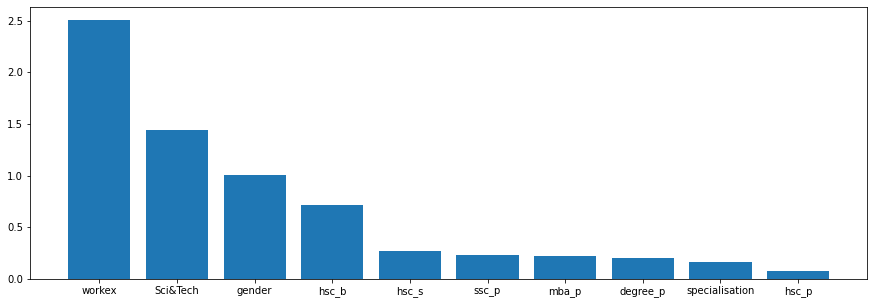

In [156]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.figure(figsize=(15,5))
    plt.bar(range(top), imp[::-1][0:top], align='center')
    plt.xticks(range(top), names[::-1][0:top])
    plt.show()

# whatever your features are called
features_names = X.columns 
# Specify your top n features you want to visualize.
# You can also discard the abs() function 
# if you are interested in negative contribution of features
f_importances(abs(svm.coef_[0]), features_names, top=10)


In [157]:
#logistic regression

In [158]:
lr=LogisticRegression()
lr.fit(xtrain_res,ytrain_res)
lr_yrped=lr.predict(xtest)


C:\Users\princ\Anaconda2\envs\tf_gpu\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



<AxesSubplot:>

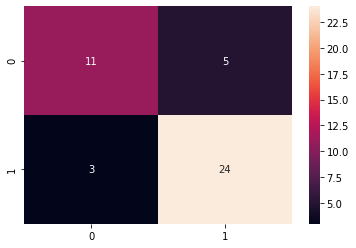

In [159]:
sns.heatmap(confusion_matrix(ytest,lr_yrped),annot=True)

In [160]:
print(classification_report(ytest,lr_yrped))

              precision    recall  f1-score   support

           0       0.79      0.69      0.73        16
           1       0.83      0.89      0.86        27

    accuracy                           0.81        43
   macro avg       0.81      0.79      0.80        43
weighted avg       0.81      0.81      0.81        43



In [161]:
rows=list(X.columns)
imp=pd.DataFrame(np.zeros(6*len(rows)).reshape(2*len(rows),3))
imp.columns=['Classifier',"Feature","Importnace"]
for index in range(0,2*len(rows),2):
    imp.iloc[index]=["Random Forest",rows[index//2],(100*rfc1.feature_importances_[index//2])]
    imp.iloc[index+1]=["XGB Classifier",rows[index//2],(100*xgb_classifier.feature_importances_[index//2])]
    

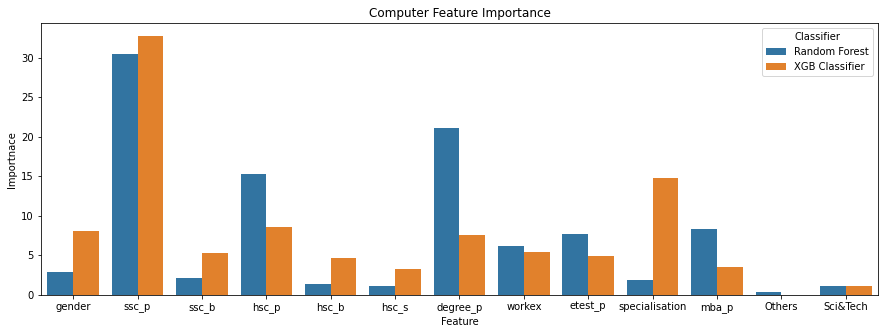

In [162]:
plt.figure(figsize=(15,5))
sns.barplot("Feature","Importnace",hue="Classifier",data=imp)
plt.title("Computer Feature Importance")
plt.show()

In [163]:
#Mean Decrease Accuracy Feature Importance
import eli5
from eli5.sklearn import PermutationImportance

In [164]:
perm=PermutationImportance(svm).fit(xtrain_res,ytrain_res)
perm1=PermutationImportance(xgb_classifier).fit(xtrain_res,ytrain_res)
perm2=PermutationImportance(rfc1).fit(xtrain_res,ytrain_res)
eli5.show_weights(perm)

In [165]:
eli5.show_weights(perm1)

In [166]:
eli5.show_weights(perm2)

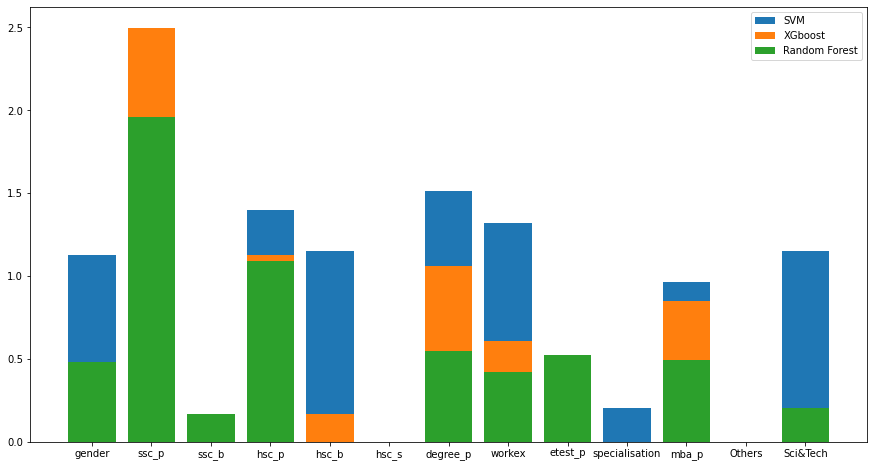

In [167]:

plt.figure(figsize=(15,8))
plt.bar(rows,perm.feature_importances_std_*100)
plt.bar(rows,perm1.feature_importances_std_*100)
plt.bar(rows,perm2.feature_importances_std_*100)
plt.legend(["SVM","XGboost","Random Forest"])
plt.show()

In [168]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier, plot_importance 
clf_rf = RandomForestClassifier()
clf_et = ExtraTreesClassifier()
clf_bc = BaggingClassifier()
clf_ada = AdaBoostClassifier()
clf_dt = DecisionTreeClassifier()
clf_xg = XGBClassifier()
clf_lr = LogisticRegression()
clf_svm = SVC()

In [169]:
npX = np.array(xtrain_res).copy()
npy = np.array(ytrain_res).copy()
Classifiers = ['RandomForest','ExtraTrees','Bagging','AdaBoost','DecisionTree','XGBoost','LogisticRegression','SVM']
scores = []
models = [clf_rf, clf_et, clf_bc, clf_ada, clf_dt, clf_xg, clf_lr, clf_svm]
for model in models:
    score = cross_val_score(model, npX, npy, scoring = 'accuracy', cv = 10, n_jobs = -1).mean()
    scores.append(score)

In [170]:
mode = pd.DataFrame(scores, index = Classifiers, columns = ['score']).sort_values(by = 'score',
             ascending = False)

In [171]:
mode

score
RandomForest        0.925833
ExtraTrees          0.922167
XGBoost             0.917667
Bagging             0.917333
AdaBoost            0.897333
LogisticRegression  0.893000
SVM                 0.867500
DecisionTree        0.847500

In [173]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
x = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = .2)
X_train_reduced = PCA(n_components = 2).fit_transform(X_train)
X_test_reduced  = PCA(n_components=  2).fit_transform(X_test)

In [174]:
def boundaries(model, heading, best_params):
    Model = model(**best_params)
    Model.fit(X_train_reduced, y_train)

    X_set, y_set = np.concatenate([X_train_reduced, X_test_reduced], axis = 0), np.concatenate([y_train, y_test], axis = 0)
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                             np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

    #plt.figure(figsize = [15,16])
    plt.contourf(X1, X2, Model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                     alpha = 0.5, cmap = ListedColormap(('k', 'blue')))
    
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())

    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
    plt.xticks(fontsize = 3)
    plt.yticks(fontsize = 3)

In [175]:
parameters_xg = {'max_depth':[3,6,7], 'learning_rate': [0.1,0.2], 'n_estimators': [300,200], 
                 'min_child_weight': [4], 'reg_alpha': [6,0], 'reg_lambda': [1,8],'max_delta_step':[2],
                 'gamma':[0],'seed':[1]}

parameters_svm = {'C':[0.9,0.01],'kernel':['rbf','linear'], 'gamma':[0,0.1,'auto'], 'probability':[True,False],
                  'random_state':[0,7,16],'decision_function_shape':['ovo','ovr'],'degree':[3,4,10]}

parameters_rf = {'n_estimators': [100,50], 'max_features': [7,'auto',None],
                 'n_jobs': [-1], 'min_samples_leaf': [2,4,], 'random_state':[1,7,], 
                 'min_samples_split':[2,6,], 'oob_score': [True,False],
                 'criterion': ['gini'], 'warm_start': [True,False]}

In [176]:
def grid(model,parameters):
    grid = GridSearchCV(estimator = model, param_grid = parameters, cv = 10, 
                        scoring = 'accuracy')
    grid.fit(npX,npy)
    return grid.best_score_, grid.best_estimator_.get_params()


In [177]:
def imp_features(model, model_name, params):
    Model = model(**params)
    Model.fit(npX,npy)
    names = X.columns
    feature = Model.feature_importances_
    important_features = pd.Series(data = feature, index = names,)
    important_features = important_features.sort_values(ascending = True)
    return important_features.plot(kind = 'barh', grid = False,title = model_name)

0.9135


<AxesSubplot:title={'center':'XGBoostClassifier'}>

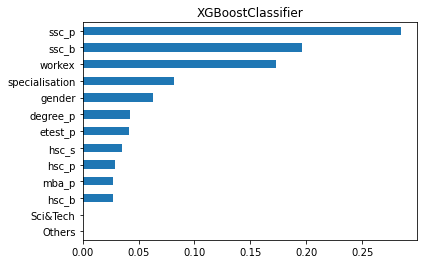

In [178]:
best_score_xg, best_params_xg = grid(clf_xg,parameters_xg)
print(best_score_xg)
imp_features(XGBClassifier, 'XGBoostClassifier', best_params_xg)

0.9255000000000001


<AxesSubplot:title={'center':'Random Forest'}>

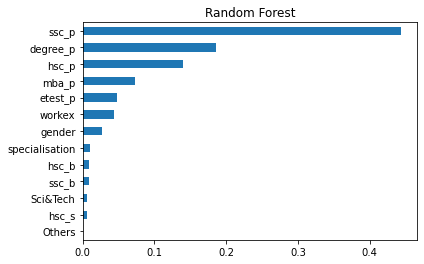

In [179]:
best_score_rf, best_params_rf = grid(clf_rf, parameters_rf)
print(best_score_rf)
imp_features(RandomForestClassifier,'Random Forest', best_params_rf)

In [180]:
best_score_svm, best_params_svm = grid(clf_svm, parameters_svm)
print(best_score_svm)


ValueError: The gamma value of 0.0 is invalid. Use 'auto' to set gamma to a value of 1 / n_features.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


ValueError: max_features must be in (0, n_features]

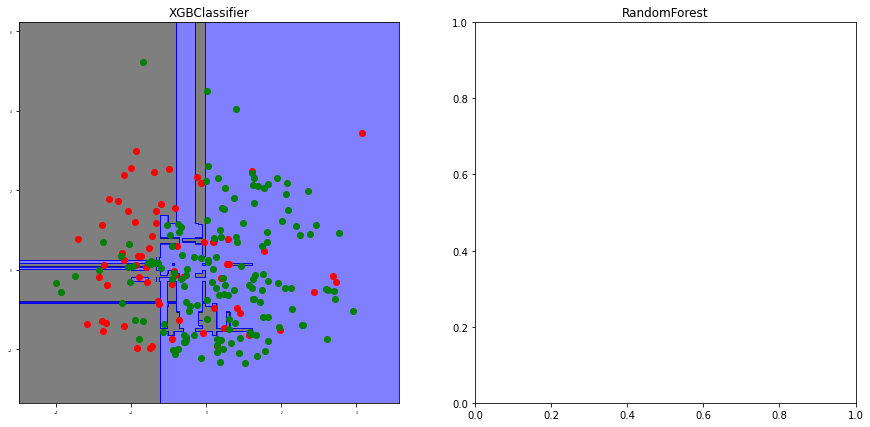

In [185]:
fig = plt.figure(figsize=[15,7])

ax = plt.subplot(1,2,1)
plt.title('XGBClassifier')
boundaries(XGBClassifier,'eXtreme Boosting Classifier', best_params_xg)


ax = plt.subplot(1,2,2)
plt.title('RandomForest')
boundaries(RandomForestClassifier, 'Random Forest', best_params_rf)

In [184]:
from mlxtend.plotting import plot_decision_regions
t = np.array(y_train)
t = t.astype(np.integer)
clf_svm = SVC(**best_params_svm)
clf_svm.fit(X_train_reduced,t)
plt.figure(figsize = [15,10])
plot_decision_regions(X_train_reduced, t, clf = clf_svm, hide_spines = False, colors = 'purple,limegreen',
                      markers = ['^','v'])
plt.title('Support Vector Machines')

NameError: name 'best_params_svm' is not defined

In [186]:
clf_svm = SVC(**best_params_svm)
clf_svm.fit(npX,npy)
testdf = xtest
nptest = np.array(testdf)
pred = clf_svm.predict(nptest)
predictions = pd.DataFrame(pred, index = testdf.index, columns = ['status'])
predictions.to_csv('predictions_svm_with_groups.csv')

NameError: name 'best_params_svm' is not defined

In [ ]:
clf_svm = SVC(**best_params_svm)
clf_svm.fit(npX,npy)
testdf = xtest
nptest = np.array(testdf)
pred = clf_svm.predict(nptest)
predictions = pd.DataFrame(pred, index = testdf.index, columns = ['status'])
predictions.to_csv('predictions_svm_with_groups.csv')

In [187]:
clf_rf=RandomForestClassifier(**best_params_rf)
clf_rf.fit(npX,npy)
testdf = xtest
nptest = np.array(testdf)
pred = clf_rf.predict(nptest)
predictions = pd.DataFrame(pred, index = testdf.index, columns = ['status'])
predictions.to_csv('predictions_svm_with_groups.csv')

In [190]:
accuracy_score(ytest,predictions)

0.7674418604651163

In [191]:
print(classification_report(ytest,predictions))

              precision    recall  f1-score   support

           0       0.69      0.69      0.69        16
           1       0.81      0.81      0.81        27

    accuracy                           0.77        43
   macro avg       0.75      0.75      0.75        43
weighted avg       0.77      0.77      0.77        43

